![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
#replace special characters
crimes.columns = (crimes.columns.str.lower().
                                 str.replace(" ","_"))

In [3]:
# Renaming the column
crimes = crimes.rename(columns={"file_number": "file_number",
                                "date_rptd": "date_reported",
                                "date_occ":"date_of_occurence",
                                "time_occ":"time_of_occurence",
                                "crm_cd_desc":"crime_commmitted"})

In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   dr_no              185715 non-null  int64         
 1   date_reported      185715 non-null  datetime64[ns]
 2   date_of_occurence  185715 non-null  datetime64[ns]
 3   time_of_occurence  185715 non-null  object        
 4   area_name          185715 non-null  object        
 5   crime_commmitted   185715 non-null  object        
 6   vict_age           185715 non-null  int64         
 7   vict_sex           185704 non-null  object        
 8   vict_descent       185705 non-null  object        
 9   weapon_desc        73502 non-null   object        
 10  status_desc        185715 non-null  object        
 11  location           185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [5]:
crimes["time_of_occurence"]=crimes["time_of_occurence"].apply(lambda x: x[:2] + ":" + x[2:])

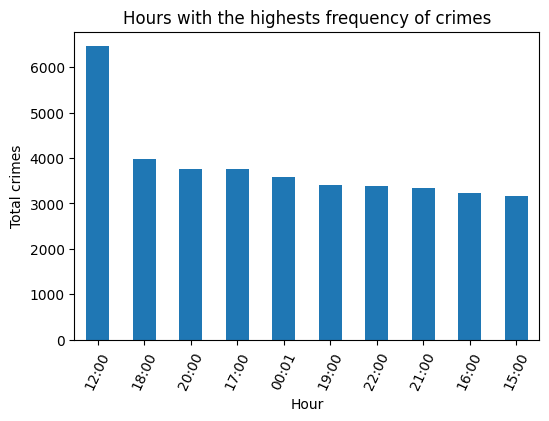

In [6]:
peak_crime_hour = crimes["time_of_occurence"].value_counts().sort_values(ascending=False).head(10)
ax = peak_crime_hour.plot(kind='bar', legend=False, figsize=(6, 4))
plt.title('Hours with the highests frequency of crimes')
plt.xlabel('Hour')
plt.ylabel('Total crimes')
plt.xticks(rotation=65)
plt.show()

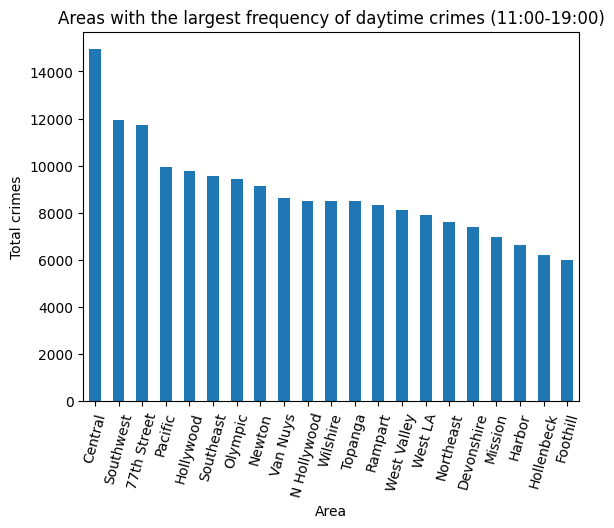

In [7]:
crimes["time_of_occurence_int"] = crimes["time_of_occurence"].str.replace(":","").astype(int)
peak_daytime_crimes = crimes[(crimes["time_of_occurence_int"] > 1100) | (crimes["time_of_occurence_int"] < 1900)]
peak_daytime_crimes_location = peak_daytime_crimes["area_name"].value_counts()
ax= peak_daytime_crimes_location.plot(kind="bar")
plt.title('Areas with the largest frequency of daytime crimes (11:00-19:00)')
plt.xlabel('Area')
plt.ylabel('Total crimes')
plt.xticks(rotation=75)
plt.show()

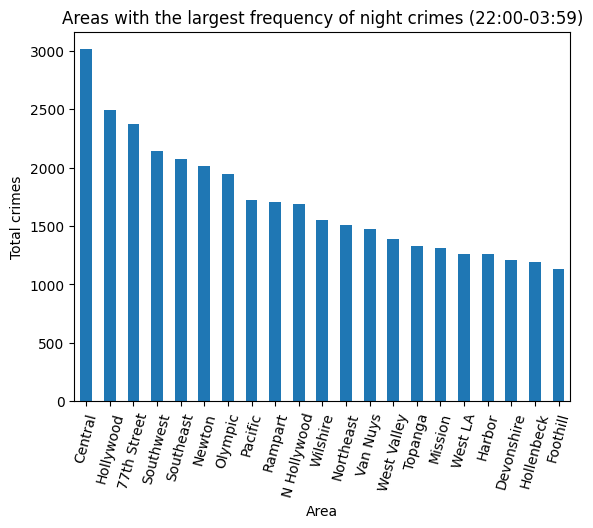

In [8]:
peak_night_crime = crimes[(crimes["time_of_occurence_int"] > 2200) | (crimes["time_of_occurence_int"] < 359)]
peak_night_crime_location = peak_night_crime["area_name"].value_counts()
ax= peak_night_crime_location.plot(kind="bar")
plt.title('Areas with the largest frequency of night crimes (22:00-03:59)')
plt.xlabel('Area')
plt.ylabel('Total crimes')
plt.xticks(rotation=75)
plt.show()

In [9]:
print(crimes["vict_age"].max())

99


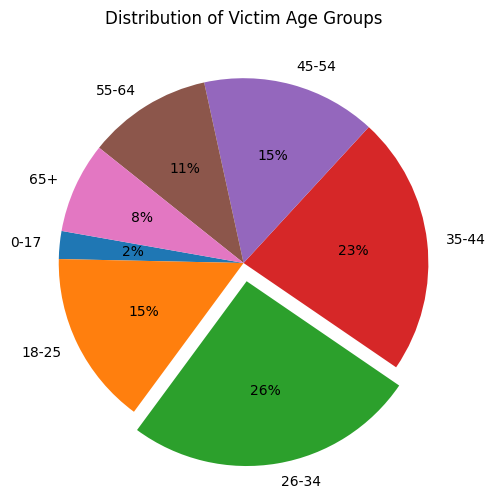

In [10]:
crimes["vict_age_group"] = pd.cut(x=crimes["vict_age"], bins=[0,17,25,34,44,54,64,99], labels= ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64","65+"])
crimes["vict_age_group"] = crimes["vict_age_group"].astype(str)
age_group_counts = crimes["vict_age_group"].value_counts().sort_index()

explode = (0,0,0.1,0,0,0,0)
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.0f%%', startangle=170, explode = explode)
plt.title("Distribution of Victim Age Groups")
plt.show()

In [11]:
# Replace 'H' with 'X' in the DataFrame
crimes["vict_sex"] = crimes["vict_sex"].replace({'H': 'X'})

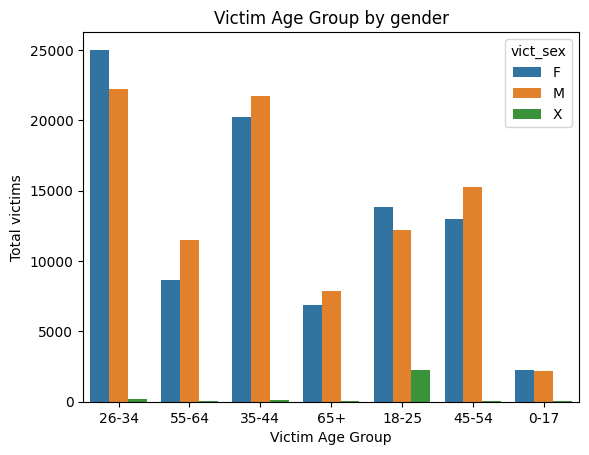

In [12]:
sns.countplot(x="vict_age_group", hue="vict_sex", data=crimes)
plt.title("Victim Age Group by gender")
plt.xlabel("Victim Age Group")
plt.ylabel('Total victims')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

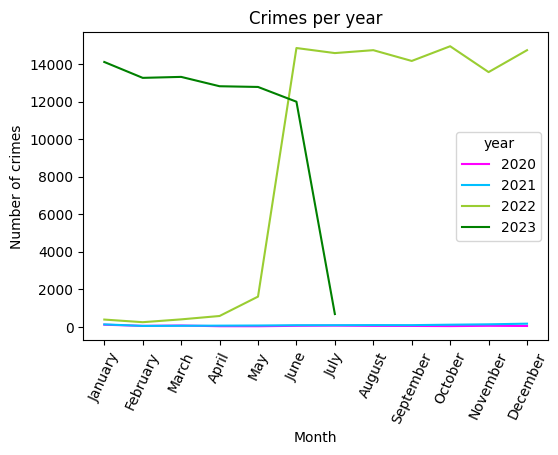

In [13]:
crimes['year'] = crimes['date_of_occurence'].dt.year
crimes['month'] = crimes['date_of_occurence'].dt.month
crimes['month_name'] = crimes['date_of_occurence'].dt.strftime('%B')

crimes_counts = crimes.groupby(["year", "month_name"]).size().reset_index(name="crimes_number_per_month")

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

crimes_counts["month_name"] = pd.Categorical(
    crimes_counts["month_name"], 
    categories=month_order, 
    ordered=True)
plt.figure(figsize=(6, 4))
sns.lineplot(data=crimes_counts, x="month_name", y="crimes_number_per_month", hue="year",  palette=['magenta', 'deepskyblue', 'yellowgreen', 'green']).set(title="Crimes per year",xlabel="Month", ylabel="Number of crimes")
plt.xticks(rotation=65)

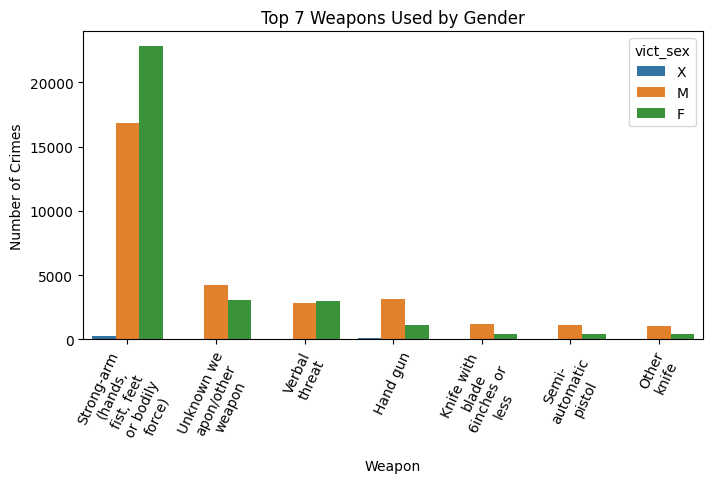

In [ ]:
import textwrap 

crimes["weapon_desc"] = crimes["weapon_desc"].str.capitalize()
top_weapons = crimes['weapon_desc'].value_counts().head(7).index
filtered_crimes = crimes[crimes['weapon_desc'].isin(top_weapons)]
weapon_gender_counts = filtered_crimes.groupby(["weapon_desc", "vict_sex"]).size().reset_index(name='Count')
total_counts = weapon_gender_counts.groupby("weapon_desc")['Count'].sum().reset_index()
sorted_weapons = total_counts.sort_values(by='Count', ascending=False)["weapon_desc"]
weapon_gender_counts["weapon_desc"] = pd.Categorical(weapon_gender_counts["weapon_desc"], categories=sorted_weapons, ordered=True)
weapon_gender_counts = weapon_gender_counts.sort_values("weapon_desc")


plt.figure(figsize=(8, 4))
sns.barplot(data=weapon_gender_counts, x="weapon_desc", y='Count', hue="vict_sex")
x_labels = weapon_gender_counts["weapon_desc"].unique()
wrapped_labels = [textwrap.fill(label, width=10) for label in x_labels]
plt.xticks(ticks=range(len(x_labels)), labels=wrapped_labels)

plt.title('Top 7 weapons used on victim  by gender')
plt.xlabel('Weapon')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=65)
plt.show()

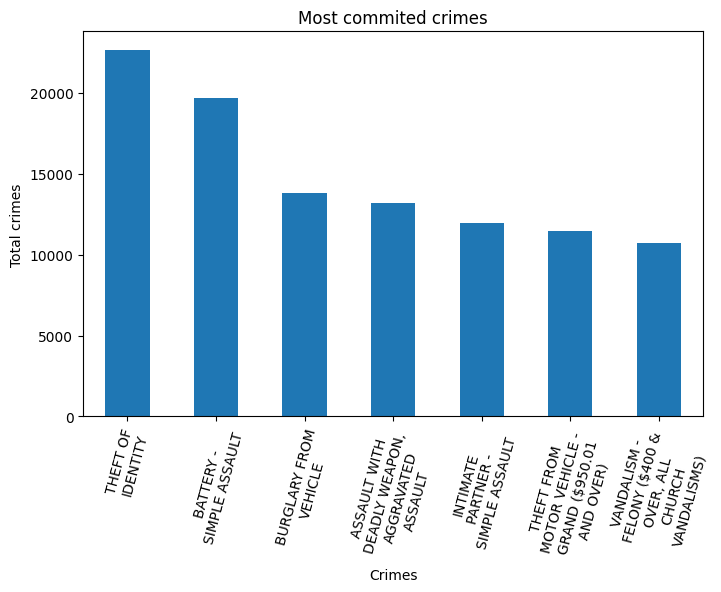

In [15]:
crimes_commited = crimes.groupby("crime_commmitted").size().sort_values(ascending=False).head(7)
ax = crimes_commited.plot(kind='bar', legend=False, figsize=(8, 5))

plt.title('Most commited crimes')
plt.xlabel('Crimes')
plt.ylabel('Total crimes')
plt.xticks(rotation=75)
# Wrapping x-axis labels
wrapped_labels = [textwrap.fill(label, width=15) for label in crimes_commited.index]
plt.xticks(ticks=range(len(crimes_commited)), labels=wrapped_labels, rotation=75)
plt.show()


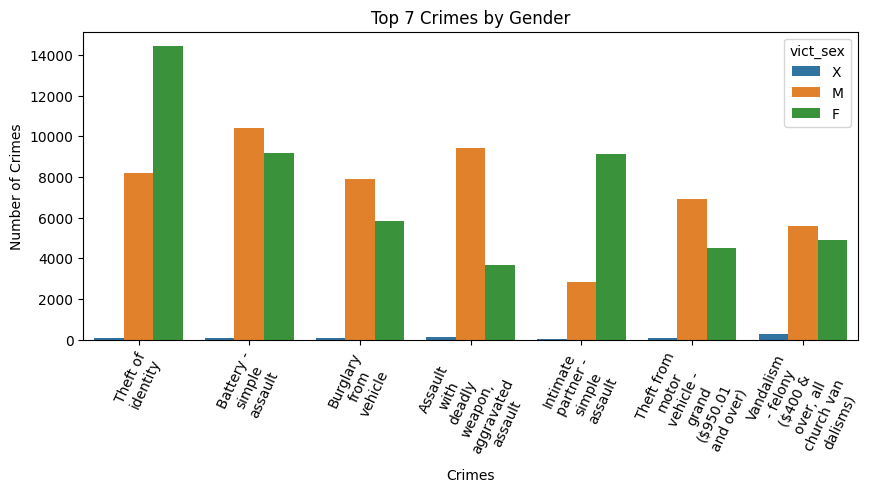

In [16]:
crimes["crime_commmitted"] = crimes["crime_commmitted"].str.capitalize()
top_crimes = crimes["crime_commmitted"].value_counts().head(7).index
filtered_top_crimes = crimes[crimes['crime_commmitted'].isin(top_crimes)]
crimes_gender_counts = filtered_top_crimes.groupby(['crime_commmitted', "vict_sex"]).size().reset_index(name='Count')

# Aggregate the total count per crimes for sorting
total_crimes_counts = crimes_gender_counts.groupby('crime_commmitted')['Count'].sum().reset_index()
sorted_crimes = total_crimes_counts.sort_values(by='Count', ascending=False)['crime_commmitted']

crimes_gender_counts['crime_commmitted'] = pd.Categorical(crimes_gender_counts['crime_commmitted'], categories=sorted_crimes, ordered=True)
crimes_gender_counts = crimes_gender_counts.sort_values('crime_commmitted')


plt.figure(figsize=(10, 4))
sns.barplot(data=crimes_gender_counts, x='crime_commmitted', y='Count', hue="vict_sex")
x_labels = crimes_gender_counts['crime_commmitted'].unique()
wrapped_labels = [textwrap.fill(label, width=10) for label in x_labels]
plt.xticks(ticks=range(len(x_labels)), labels=wrapped_labels)
plt.title('Top 7 Crimes by Gender')
plt.xlabel('Crimes')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=65)
plt.show()

In [21]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   dr_no                  185715 non-null  int64         
 1   date_reported          185715 non-null  datetime64[ns]
 2   date_of_occurence      185715 non-null  datetime64[ns]
 3   time_of_occurence      185715 non-null  object        
 4   area_name              185715 non-null  object        
 5   crime_commmitted       185715 non-null  object        
 6   vict_age               185715 non-null  int64         
 7   vict_sex               185704 non-null  object        
 8   vict_descent           185705 non-null  object        
 9   weapon_desc            73502 non-null   object        
 10  status_desc            185715 non-null  object        
 11  location               185715 non-null  object        
 12  time_of_occurence_int  185715 non-null  int6

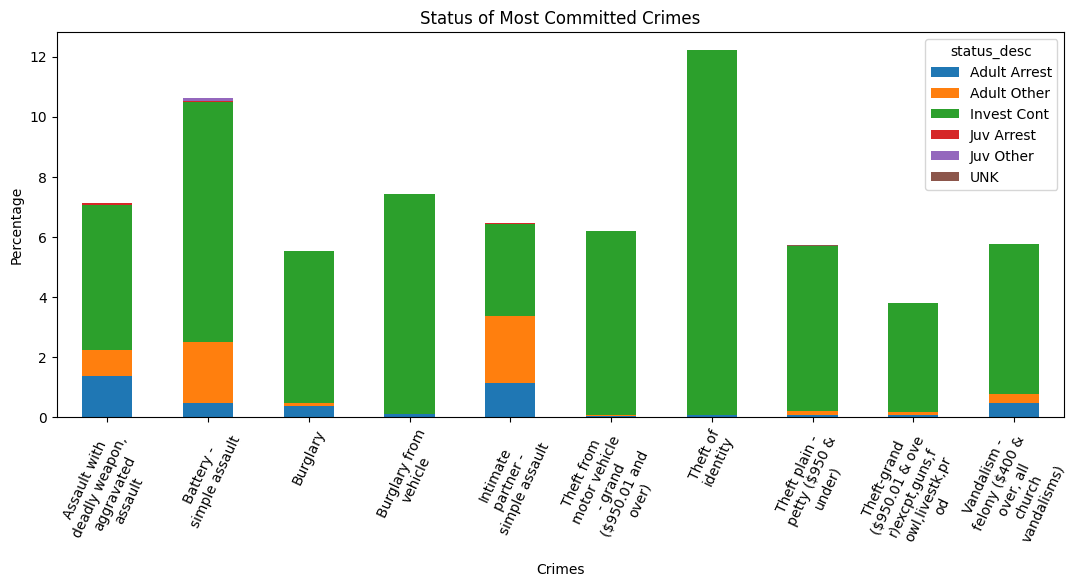

In [28]:
# Identify top crimes
top_crimes = crimes["crime_commmitted"].value_counts().head(10).index
filtered_top_crimes = crimes[crimes['crime_commmitted'].isin(top_crimes)]

# Group data and pivot
grouped_data_status = (
    filtered_top_crimes.groupby(["crime_commmitted", "status_desc"])
    .size()
    .reset_index(name="count")
)
pivot_data_status = grouped_data_status.pivot(index="crime_commmitted", columns="status_desc", values="count").fillna(0)

# Total crimes for all years
total_crimes_all_years = crimes.shape[0]

# Calculate percentages
pivot_data_status_percentage = pivot_data_status.div(total_crimes_all_years) * 100

# Plot the data
pivot_data_status_percentage.plot(kind="bar", stacked=True, figsize=(13, 5))
plt.title("Status of Most Committed Crimes")
plt.xlabel("Crimes")
plt.ylabel("Percentage")

# Wrapping x-axis labels
wrapped_labels = [textwrap.fill(label, width=14) for label in pivot_data_status_percentage.index]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=65)
plt.show()


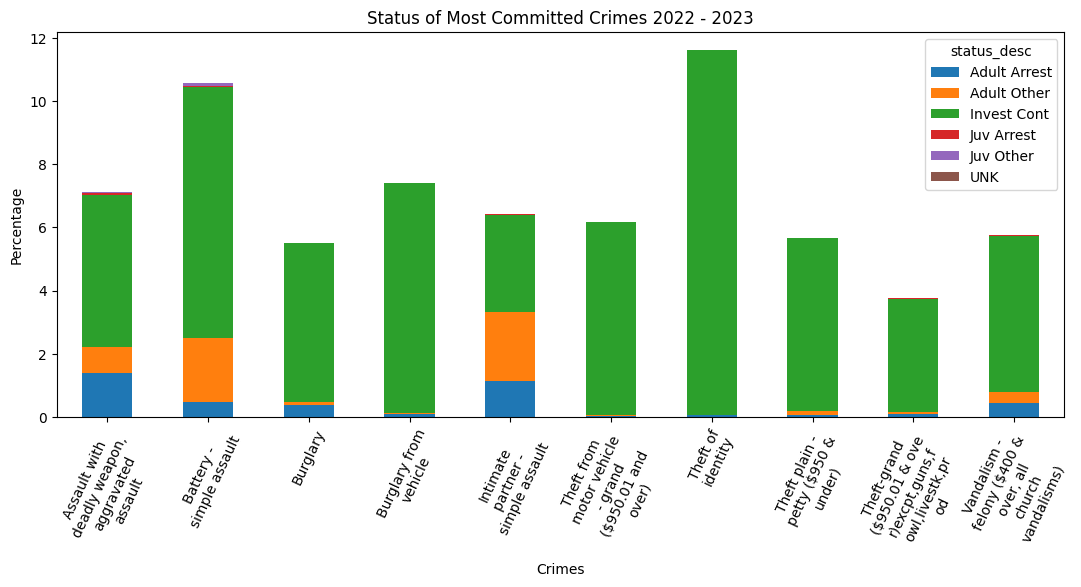

In [35]:
# Identify top crimes
top_crimes_year = crimes[(crimes['year'] == 2022) | (crimes['year'] == 2023)]

top_crimes = top_crimes_year["crime_commmitted"].value_counts().head(10).index
filtered_top_crimes = top_crimes_year[top_crimes_year['crime_commmitted'].isin(top_crimes)]

# Group data and pivot
grouped_data_status = (
    filtered_top_crimes.groupby(["crime_commmitted", "status_desc"])
    .size()
    .reset_index(name="count")
)
pivot_data_status = grouped_data_status.pivot(index="crime_commmitted", columns="status_desc", values="count").fillna(0)

# Total crimes for all years
total_crimes_all_years = crimes.shape[0]

# Calculate percentages
pivot_data_status_percentage = pivot_data_status.div(total_crimes_all_years) * 100

# Plot the data
pivot_data_status_percentage.plot(kind="bar", stacked=True, figsize=(13, 5))
plt.title("Status of Most Committed Crimes 2022 - 2023")
plt.xlabel("Crimes")
plt.ylabel("Percentage")

# Wrapping x-axis labels
wrapped_labels = [textwrap.fill(label, width=14) for label in pivot_data_status_percentage.index]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=65)
plt.show()


Text(0, 0.5, 'Percentage')

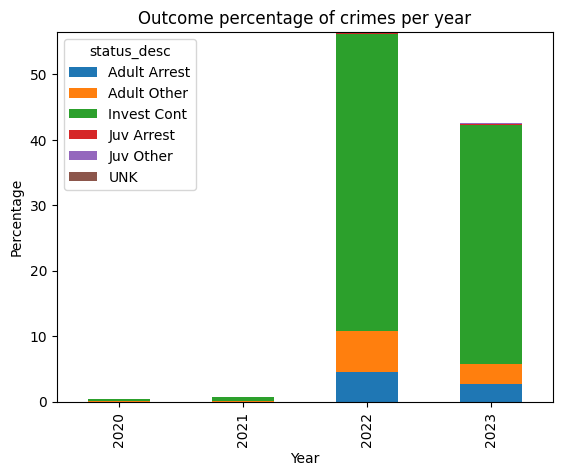

In [30]:
grouped_data= crimes.groupby(["year","status_desc"]).size().reset_index(name="count")
pivot_data = grouped_data.pivot(index="year", columns="status_desc", values="count").fillna(0)
# Υπολογισμός του συνολικού αριθμού εγκλημάτων στο σύνολο του dataset (όχι ανά έτος)
total_crimes_all_years = crimes.shape[0]

# Υπολογισμός ποσοστών κάθε κατηγορίας ως ποσοστό του συνολικού αριθμού εγκλημάτων
percentage_data = pivot_data.div(total_crimes_all_years, axis=0) * 100

percentage_data.plot(kind="bar", stacked=True)
plt.title("Outcome percentage of crimes per year")
plt.xlabel("Year")
plt.ylabel("Percentage")


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   dr_no                  185715 non-null  int64         
 1   date_reported          185715 non-null  datetime64[ns]
 2   date_of_occurence      185715 non-null  datetime64[ns]
 3   time_of_occurence      185715 non-null  object        
 4   area_name              185715 non-null  object        
 5   crime_commmitted       185715 non-null  object        
 6   vict_age               185715 non-null  int64         
 7   vict_sex               185704 non-null  object        
 8   vict_descent           185705 non-null  object        
 9   weapon_desc            73502 non-null   object        
 10  status_desc            185715 non-null  object        
 11  location               185715 non-null  object        
 12  time_of_occurence_int  185715 non-null  int6

                   date_of_occurence  time_of_occurence  area_name  \
date_of_occurence           1.000000           0.052358   0.006404   
time_of_occurence           0.052358           1.000000   0.010075   
area_name                   0.006404           0.010075   1.000000   
crime_commmitted           -0.054610          -0.078438   0.044179   
vict_age                    0.001515          -0.015126   0.035399   
vict_sex                    0.016358           0.033921   0.034431   
vict_descent                0.005825           0.032023   0.148513   
weapon_desc                -0.039822          -0.039239   0.060040   
month_name                 -0.096117           0.000003   0.000264   

                   crime_commmitted  vict_age  vict_sex  vict_descent  \
date_of_occurence         -0.054610  0.001515  0.016358      0.005825   
time_of_occurence         -0.078438 -0.015126  0.033921      0.032023   
area_name                  0.044179  0.035399  0.034431      0.148513   
crime_c

<Axes: >

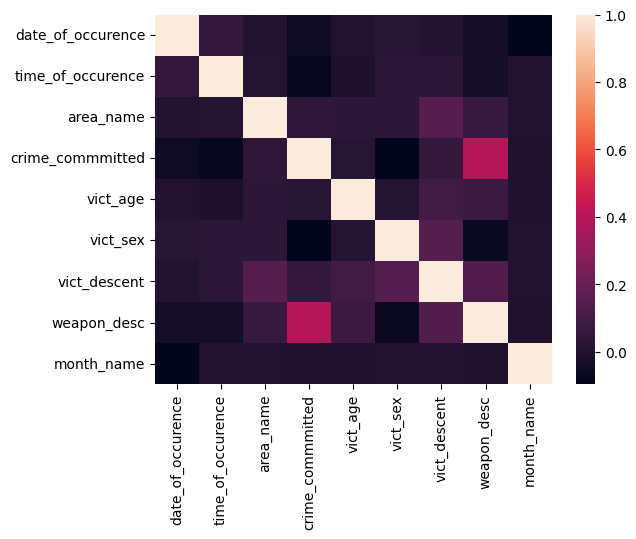

In [31]:
features_crimes = crimes[["date_of_occurence", "time_of_occurence","area_name","crime_commmitted","vict_age","vict_sex","vict_descent","weapon_desc","month_name"]]
encoded_features_crimes = features_crimes.copy()
non_numeric_cols = ["date_of_occurence", "time_of_occurence","area_name","crime_commmitted","vict_sex","vict_descent","weapon_desc","month_name"]

# Apply label encoding to each non-numeric column
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    encoded_features_crimes[col] = le.fit_transform(encoded_features_crimes[col])
    label_encoders[col] = le

correlation_matrix=encoded_features_crimes.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)